In [144]:
import pandas as pd
import numpy as np

data = pd.read_csv('../data/games_of_all_time.csv')
model_data = data[['user_score', 'meta_score', 'genre', 'rating']]
model_data = model_data.dropna()

model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7691 entries, 0 to 8830
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_score  7691 non-null   float64
 1   meta_score  7691 non-null   float64
 2   genre       7691 non-null   object 
 3   rating      7691 non-null   object 
dtypes: float64(2), object(2)
memory usage: 300.4+ KB


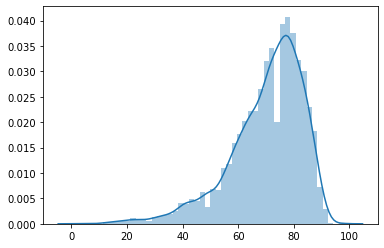

In [145]:
import seaborn as sns

sns.distplot(model_data[['user_score']])

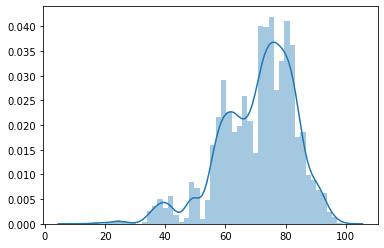

In [146]:
import seaborn as sns

sns.distplot(model_data[['meta_score']])

In [147]:
from sklearn.preprocessing import StandardScaler

uscaler = StandardScaler()
mscaler = StandardScaler()

model_data[['user_score']] = uscaler.fit_transform(model_data[['user_score']])
model_data[['meta_score']] = mscaler.fit_transform(model_data[['meta_score']])

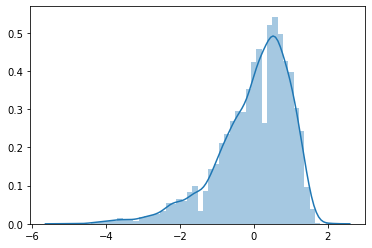

In [148]:
sns.distplot(model_data[['user_score']])

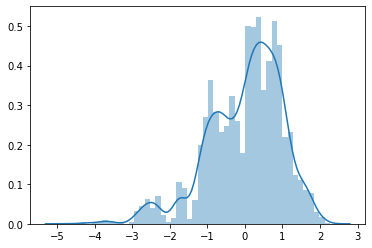

In [149]:
sns.distplot(model_data[['meta_score']])

In [150]:
import pprint
i = 0
var_dict = {}

for array in model_data[['genre']].iloc:
    #print(i)
    try: 
        g_arr = array[0][1:len(array[0])-1].split(',')
        for genre in g_arr:
            genre = genre.strip()
            genre = genre[1:len(genre)-1]
            if genre in var_dict:
                var_dict[genre] += 1
            else:
                var_dict[genre] = 1
    except:
        pass
    i += 1

pp = pprint.PrettyPrinter(indent=4)
delete = []

for genre in var_dict:
    if var_dict[genre] <= 100:
        delete.append(genre)

for genre in delete:
    del var_dict[genre]

genres = var_dict.keys()

print(len(var_dict.keys()))
pp.pprint(var_dict)
print(genres)
    

47
{   '2D': 627,
    '3D': 622,
    'Action': 2818,
    'Action Adventure': 1044,
    'Action RPG': 382,
    'Adventure': 545,
    'Arcade': 818,
    'Automobile': 281,
    "Beat-'Em-Up": 218,
    'Combat': 159,
    'Compilation': 195,
    'Console-style RPG': 165,
    'Driving': 445,
    'Fantasy': 481,
    'Fighting': 277,
    'First-Person': 651,
    'General': 1993,
    'Historic': 238,
    'Horror': 128,
    'Individual': 179,
    'Japanese-Style': 176,
    'Management': 125,
    'Miscellaneous': 895,
    'Modern': 442,
    'Music': 132,
    'Open-World': 206,
    'Platformer': 635,
    'Point-and-Click': 101,
    'Puzzle': 323,
    'Racing': 492,
    'Real-Time': 290,
    'Rhythm': 172,
    'Role-Playing': 936,
    'Sci-Fi': 518,
    "Shoot-'Em-Up": 184,
    'Shooter': 1004,
    'Sim': 285,
    'Simulation': 454,
    'Sports': 675,
    'Strategy': 728,
    'Survival': 159,
    'Tactical': 144,
    'Tactics': 119,
    'Team': 209,
    'Third-Person': 382,
    'Traditional': 386,


In [151]:
var_dict2 = {}
for rating in model_data[['rating']].iloc:
    if rating[0] in var_dict2:
        var_dict2[rating[0]] +=1
    else:
        var_dict2[rating[0]] =1
ratings = var_dict2.keys()

delete2 = []
for rating in var_dict2:
    if var_dict2[rating] <= 50:
        delete2.append(rating)
        
for rating in delete2:
    del var_dict2[rating]

print(len(var_dict2.keys()))
pp.pprint(var_dict2)
print(ratings)

4
{'E': 2371, 'E10+': 1128, 'M': 1535, 'T': 2636}
dict_keys(['E', 'T', 'E10+', 'M'])


In [152]:
def make_genre_arr(index):
    g_arr = model_data[['genre']].iloc[index][0][1:len(model_data[['genre']].iloc[index][0])-1].split(',')
    for i in range(len(g_arr)):
        g_arr[i] = g_arr[i].strip()
        g_arr[i] = g_arr[i][1:len(g_arr[i])-1]
    return g_arr
genre_dict = {}
for genre in genres:
    genre_dict[genre] = [0]*model_data.shape[0]
for i in range(model_data.shape[0]):
    gs = make_genre_arr(i)
    for genre in gs:
        if genre in genre_dict:
            genre_dict[genre][i] = 1
print('Success!')
        

Success!


In [153]:
rating_dict = {}
for rating in ratings:
    rating_dict[rating] = [0]*model_data.shape[0]
for i in range(model_data.shape[0]):
    r = model_data[['rating']].iloc[i][0]
    rating_dict[r] = 1
print('Success!')

Success!


In [154]:
from sklearn.model_selection import train_test_split

for genre in genre_dict:
    model_data[genre] = genre_dict[genre]

for rating in rating_dict:
    model_data[rating] = rating_dict[rating]

y_user = model_data[['user_score']]
y_critic = model_data[['meta_score']]
x = model_data.drop(columns = ['user_score', 'meta_score', 'genre', 'rating'])

print(x.info())

ux_train, ux_test, uy_train, uy_test = train_test_split(x, y_user, test_size=0.2, random_state=42)
cx_train, cx_test, cy_train, cy_test = train_test_split(x, y_critic, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7691 entries, 0 to 8830
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Action Adventure   7691 non-null   int64
 1   Fantasy            7691 non-null   int64
 2   Action             7691 non-null   int64
 3   Platformer         7691 non-null   int64
 4   3D                 7691 non-null   int64
 5   Shooter            7691 non-null   int64
 6   First-Person       7691 non-null   int64
 7   Sci-Fi             7691 non-null   int64
 8   Adventure          7691 non-null   int64
 9   Sports             7691 non-null   int64
 10  Traditional        7691 non-null   int64
 11  Sim                7691 non-null   int64
 12  Modern             7691 non-null   int64
 13  Fighting           7691 non-null   int64
 14  Driving            7691 non-null   int64
 15  Racing             7691 non-null   int64
 16  Miscellaneous      7691 non-null   int64
 17  Compilation   

In [155]:
from sklearn.ensemble import RandomForestRegressor

regr1 = RandomForestRegressor(n_estimators=1000, random_state=0)
regr2 = RandomForestRegressor(n_estimators=1000, random_state=0)

regr1.fit(ux_train, np.ravel(uy_train))
regr2.fit(cx_train, np.ravel(cy_train))

RandomForestRegressor(n_estimators=1000, random_state=0)

In [156]:
regr1.score(ux_test, np.ravel(uy_test))

0.04496361842295804

In [157]:
regr2.score(cx_test, np.ravel(cy_test))

0.023994009301412156

[64.60260391 65.96969641 67.32892766 ... 68.38488834 72.24248733
 68.9690282 ]


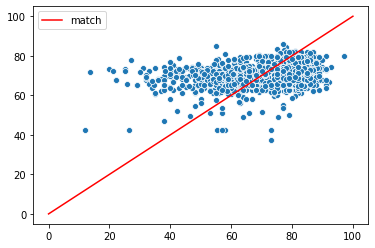

In [158]:
import seaborn as sns
pred = regr1.predict(ux_test)
uy_test = uscaler.inverse_transform(uy_test)
pred = uscaler.inverse_transform(pred)
print(pred)
sns.scatterplot(x=np.ravel(uy_test), y=pred)
sns.lineplot([0,100], [0,100], hue=['match','match'], palette=['r'])

[69.19495859 72.80583233 68.26672756 ... 67.82511237 73.72229405
 66.65106515]


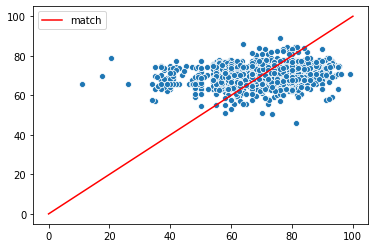

In [159]:
import seaborn as sns
pred = regr2.predict(cx_test)
cy_test = mscaler.inverse_transform(cy_test)
pred = mscaler.inverse_transform(pred)
print(pred)
sns.scatterplot(x=np.ravel(cy_test), y=pred)
sns.lineplot([0,100], [0,100], hue=['match','match'], palette=['r'])